In [48]:
import tensorflow as tf
from tensorflow import keras

In [49]:
import numpy as np
import matplotlib.pyplot as plt

In [50]:
print(tf.__version__)

2.2.0


In [51]:
fashion_mnist = keras.datasets.fashion_mnist

In [52]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [53]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover' , 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneakers', 'Bag', 'Ankle boot']

In [54]:
train_images.shape

(60000, 28, 28)

In [55]:
len(train_labels)

60000

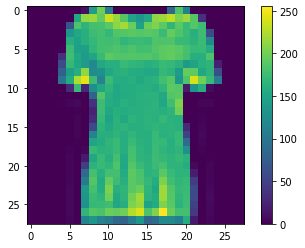

In [56]:
plt.figure()
plt.imshow(train_images[10])
plt.colorbar()
plt.grid(False)
plt.show()

In [57]:
train_images = train_images / 255.0
test_images = test_images / 255.0

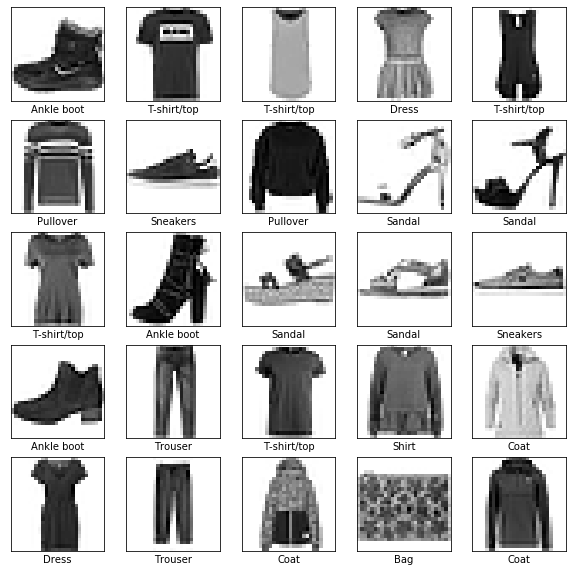

In [58]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [59]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])

In [60]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [61]:
model.fit(train_images, train_labels, epochs=15)

Epoch 1/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4975 - accuracy: 0.8260
Epoch 2/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3745 - accuracy: 0.8659
Epoch 3/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3365 - accuracy: 0.8774
Epoch 4/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3128 - accuracy: 0.8850
Epoch 5/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2954 - accuracy: 0.8902
Epoch 6/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2794 - accuracy: 0.8967
Epoch 7/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2683 - accuracy: 0.9008
Epoch 8/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2556 - accuracy: 0.9058
Epoch 9/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2475 - accuracy: 0.9079
Epoch 10/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.238

In [63]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.3402 - accuracy: 0.8872

Test accuracy: 0.8871999979019165


In [64]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [65]:
predictions = probability_model.predict(test_images)

In [66]:
predictions[0]

array([9.3357999e-10, 5.3266873e-14, 1.0508280e-09, 4.8609082e-16,
       1.5366155e-11, 3.2683261e-04, 1.2131547e-10, 1.5143757e-03,
       1.1534348e-10, 9.9815875e-01], dtype=float32)

In [67]:
np.argmax(predictions[0])

9

In [68]:
test_labels[0]

9

In [69]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

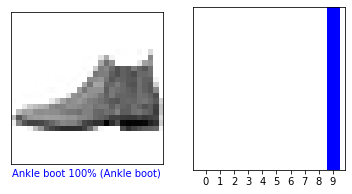

In [70]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

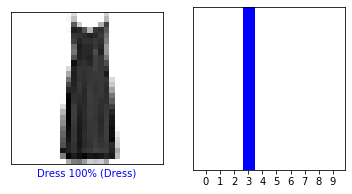

In [71]:
i = 13
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

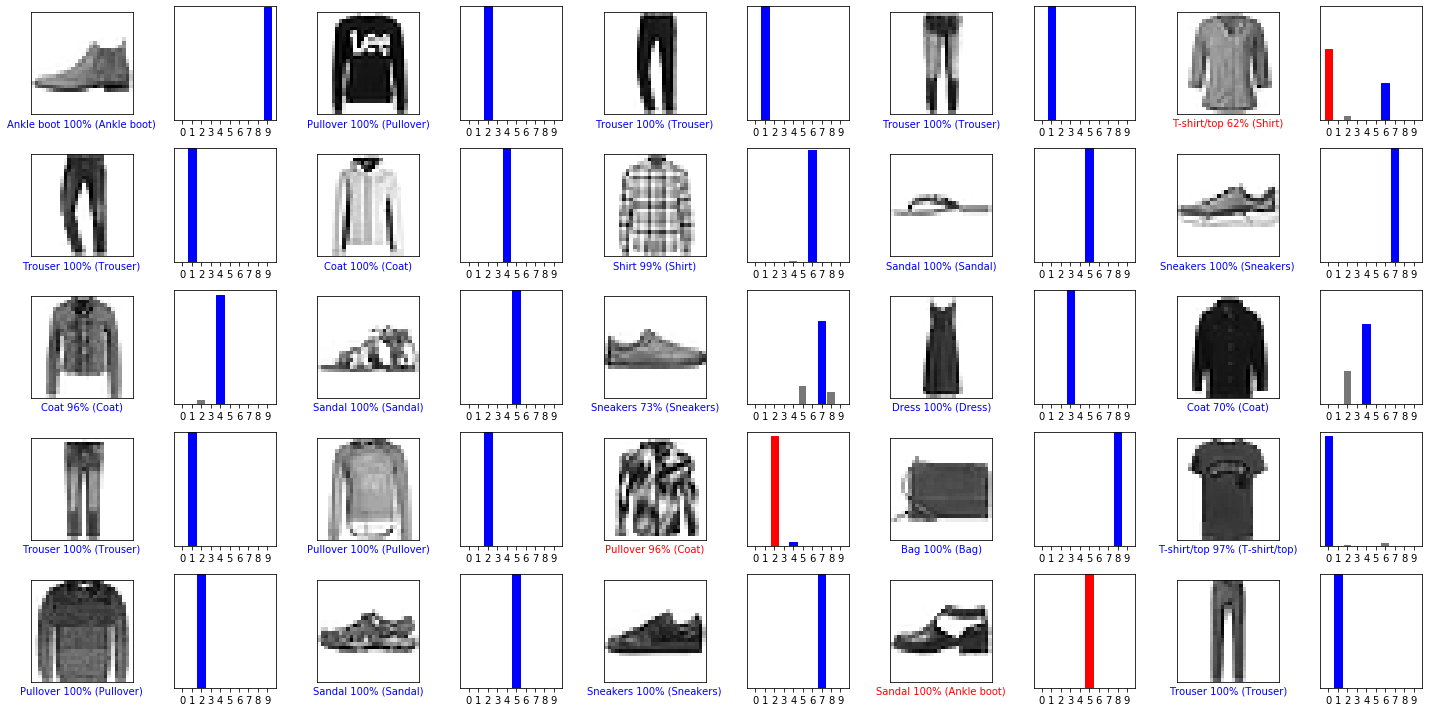

In [72]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 5
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()